# Decision Tree Regression

## Importing the libraries

In [ ]:
# =========================================
# Importing the Libraries
# =========================================

# NumPy for numerical operations
import numpy as np

# Matplotlib for visualization
import matplotlib.pyplot as plt

# Pandas for handling datasets
import pandas as pd


## Importing the dataset

In [ ]:
# =========================================
# Importing the Dataset
# =========================================

# Read the CSV file containing Position and Salary data
dataset = pd.read_csv('Position_Salaries.csv')

# ================================
# Prepare Feature Matrix (X)
# ================================
# iloc[:, 1:-1] → take all rows, columns from index 1 to the second-last column
# In our dataset:
#   - Column 0: Position (not used as numeric feature)
#   - Column 1: Level (used as feature)
X = dataset.iloc[:, 1:-1].values  # 2D array needed for sklearn

# ================================
# Prepare Dependent Variable Vector (y)
# ================================
# iloc[:, -1] → take all rows, last column
# Column 2: Salary (target value to predict)
y = dataset.iloc[:, -1].values


## Training the Decision Tree Regression model on the whole dataset

In [ ]:
# =========================================
# Training the Decision Tree Regression Model
# =========================================

from sklearn.tree import DecisionTreeRegressor

# Initialize the regressor
# random_state=0 ensures reproducibility (keeps results same every run)
regressor = DecisionTreeRegressor(random_state=0)

# Fit the model on the whole dataset
# Decision Tree learns patterns by splitting data into regions
regressor.fit(X, y)


DecisionTreeRegressor(random_state=0)

## Predicting a new result

In [ ]:
# =========================================
# Predicting a New Result
# =========================================

# Predict the salary for a specific level (Level = 6.5)
# Decision Tree will select the Leaf where this value falls
y_pred = regressor.predict([[6.5]])

# Print the predicted salary
print(y_pred)


[150000.]


## Visualising the Decision Tree Regression results (higher resolution)

/tmp/ipython-input-3195836280.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


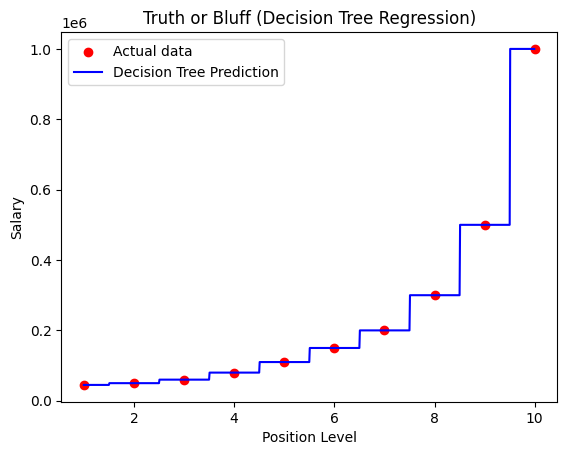

In [ ]:
# =========================================
# Visualising the Decision Tree Regression Results (High Resolution)
# =========================================

# Create a high-resolution grid for X (Step = 0.01)
# This allows us to see the "stair-step" shape clearly
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# Plot original data points
plt.scatter(X, y, color='red', label='Actual data')

# Plot Decision Tree predictions on high-resolution grid
plt.plot(X_grid, regressor.predict(X_grid), color='blue', label='Decision Tree Prediction')

# Add title and labels
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()


##BOUNS QUESTIONS

/tmp/ipython-input-401899462.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_new), max(X_new), 0.01)


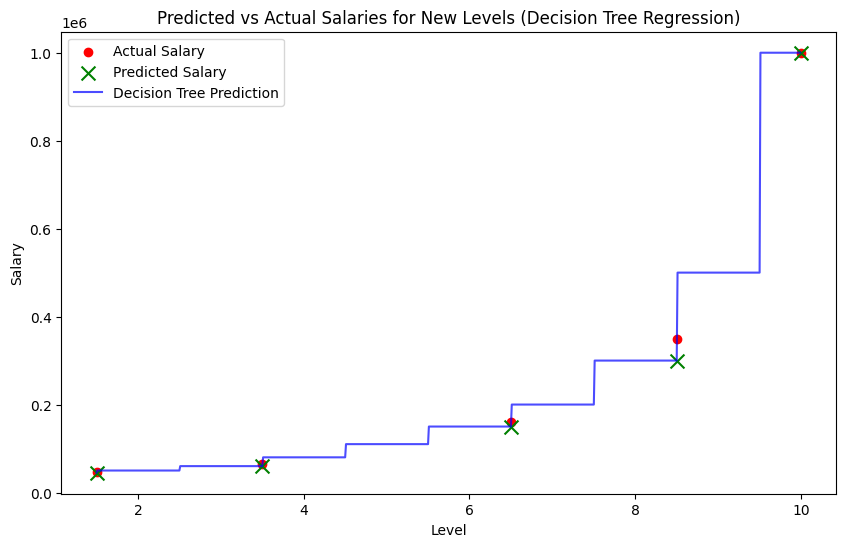

In [ ]:
# ================================================
# Decision Tree Regression Prediction and Visualization for New Levels
# ================================================

# ================================
# New Levels for prediction
# ================================
# These are the candidate levels for which we want to predict salary
X_new = np.array([1.5, 3.5, 6.5, 8.5, 10])

# ================================
# Reshape X_new to 2D array
# ================================
# Required shape for sklearn: (n_samples, n_features)
X_new = X_new.reshape((len(X_new), 1))

# ================================
# Predict salaries using the trained Decision Tree Regressor
# ================================
y_new_pred = regressor.predict(X_new)

# ================================
# Suppose we have the actual salaries for these new levels
# ================================
y_new_actual = np.array([47000, 65000, 160000, 350000, 1000000])

# ================================
# Visualize Actual vs Predicted Salaries
# ================================
plt.figure(figsize=(10,6))

# Scatter plot for actual salaries
plt.scatter(X_new, y_new_actual, color='red', label='Actual Salary')

# Scatter plot for predicted salaries
plt.scatter(X_new, y_new_pred, color='green', label='Predicted Salary', marker='x', s=100)

# Plot Decision Tree prediction curve (high-resolution grid)
X_grid = np.arange(min(X_new), max(X_new), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, regressor.predict(X_grid), color='blue', alpha=0.7, label='Decision Tree Prediction')

# Add title and axis labels
plt.title('Predicted vs Actual Salaries for New Levels (Decision Tree Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')

# Add legend
plt.legend()

# Display the plot
plt.show()
